In [23]:
#STEP 1:EXTRACT

In [24]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon_sales_data.csv')

# Display the first few rows to understand the structure
df.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [25]:
# STEP2:TRANSFORM

In [26]:
#Converting Date Columns
#We have two date columns: Order Date and Ship Date . We'll convert them to datetime format.

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [27]:
#Adding Month and Year Columns
# Extract month and year from order_date
df['order_month'] = df['Order Date'].dt.month
df['order_year'] = df['Order Date'].dt.year

# create a column for year-month for easier grouping
df['year_month'] = df['Order Date'].dt.to_period('M')


In [28]:
#Handling Missing Values
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing order_date or ship_date
df = df.dropna(subset=['Order Date', 'Ship Date'])


Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
order_month       0
order_year        0
year_month        0
dtype: int64


In [29]:
#STEP3: LOAD

In [30]:
# Display the cleaned DataFrame
df.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,order_month,order_year,year_month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,2013-02


In [31]:
#STEP4:ANALYSIS

<AxesSubplot:title={'center':'Month-wise Sales Trend'}, xlabel='order_month'>

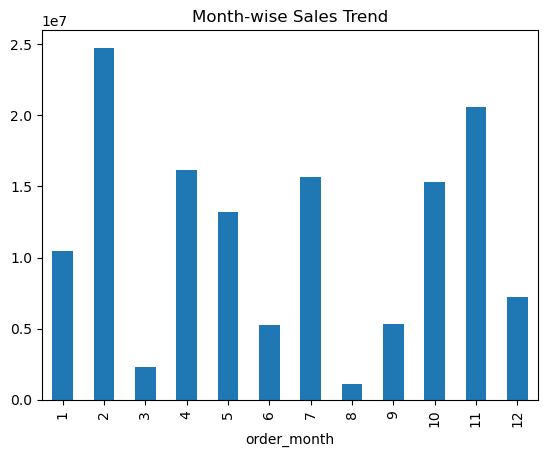

In [32]:
#Sales Trends
#Month-wise Sales Trend:
# Group by month and sum the total revenue
month_wise_sales = df.groupby('order_month')['Total Revenue'].sum()

# Plot month-wise sales trend
month_wise_sales.plot(kind='bar', title='Month-wise Sales Trend')


<AxesSubplot:title={'center':'Year-wise Sales Trend'}, xlabel='order_year'>

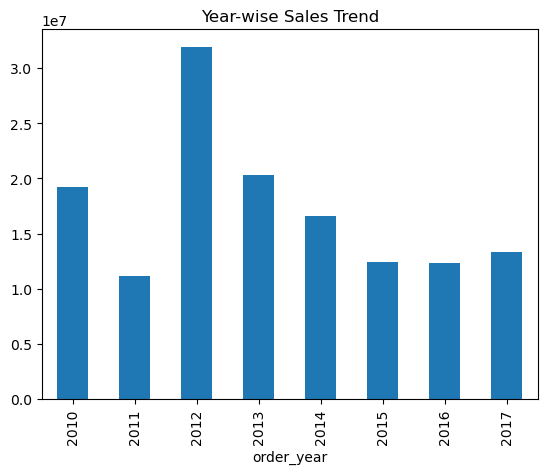

In [33]:
#Year-wise Sales Trend
# Group by year and sum the total revenue
year_wise_sales = df.groupby('order_year')['Total Revenue'].sum()

# Plot year-wise sales trend
year_wise_sales.plot(kind='bar', title='Year-wise Sales Trend')


<AxesSubplot:title={'center':'Yearly Month-wise Sales Trend'}, xlabel='year_month'>

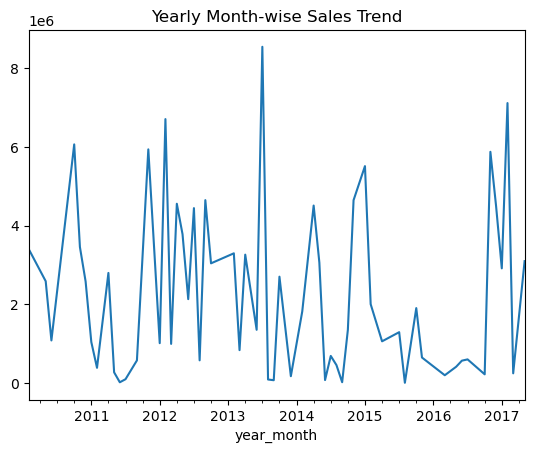

In [34]:
#Yearly Month-wise Sales Trend:
# Group by year and month and sum the total revenue
yearly_month_wise_sales = df.groupby('year_month')['Total Revenue'].sum()

# Plot yearly month-wise sales trend
yearly_month_wise_sales.plot(kind='line', title='Yearly Month-wise Sales Trend')


In [35]:
#Key Metrics

In [36]:
#Total Sales
total_sales = df['Total Revenue'].sum()
print(f"Total Sales: ${total_sales}")


Total Sales: $137348768.31


In [37]:
#Average Sales per Transaction:
average_sales_per_transaction = df['Total Revenue'].mean()
print(f"Average Sales per Transaction: ${average_sales_per_transaction}")


Average Sales per Transaction: $1373487.6830999998


In [38]:
#Top Selling Regions/Countries
# Group by region and sum the total revenue
top_regions = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
print("Top Selling Regions:\n", top_regions)

# Group by country and sum the total revenue
top_countries = df.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False)
print("Top Selling Countries:\n", top_countries)


Top Selling Regions:
 Region
Sub-Saharan Africa                   39672031.43
Europe                               33368932.11
Asia                                 21347091.02
Australia and Oceania                14094265.13
Middle East and North Africa         14052706.58
Central America and the Caribbean     9170385.49
North America                         5643356.55
Name: Total Revenue, dtype: float64
Top Selling Countries:
 Country
Honduras        6336545.48
Myanmar         6161257.90
Djibouti        6052890.86
Turkmenistan    5822036.20
Mexico          5643356.55
                   ...    
Syria             35304.72
Slovakia          26344.26
New Zealand       20404.71
Kyrgyzstan        19103.44
Kuwait             4870.26
Name: Total Revenue, Length: 76, dtype: float64


In [39]:
#Relationships Between Attributes

In [40]:
#Correlation Matrix
correlation_matrix = df.corr()
print(correlation_matrix)


               Order ID  Units Sold  Unit Price  Unit Cost  Total Revenue  \
Order ID       1.000000   -0.222907   -0.190941  -0.213201      -0.314688   
Units Sold    -0.222907    1.000000   -0.070486  -0.092232       0.447784   
Unit Price    -0.190941   -0.070486    1.000000   0.987270       0.752360   
Unit Cost     -0.213201   -0.092232    0.987270   1.000000       0.715623   
Total Revenue -0.314688    0.447784    0.752360   0.715623       1.000000   
Total Cost    -0.328944    0.374746    0.787905   0.774895       0.983928   
Total Profit  -0.234638    0.564550    0.557365   0.467214       0.897327   
order_month   -0.111219   -0.007995   -0.031917  -0.042016       0.003835   
order_year     0.081752    0.012455   -0.061791  -0.071567      -0.037128   

               Total Cost  Total Profit  order_month  order_year  
Order ID        -0.328944     -0.234638    -0.111219    0.081752  
Units Sold       0.374746      0.564550    -0.007995    0.012455  
Unit Price       0.787905   

<AxesSubplot:title={'center':'Units Sold vs. Total Profit'}, xlabel='Units Sold', ylabel='Total Profit'>

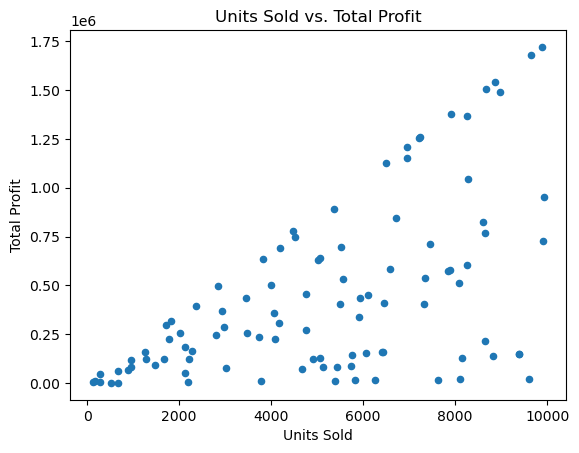

In [41]:
#Example plot
df.plot(kind='scatter', x='Units Sold', y='Total Profit', title='Units Sold vs. Total Profit')


In [42]:
#SOME MORE ANALYSIS PLOTS

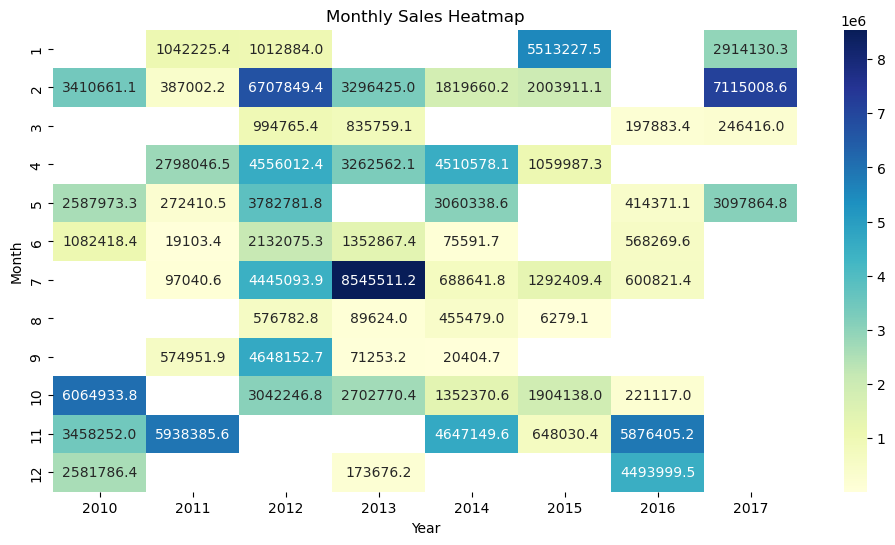

In [44]:
#Heatmap
import seaborn as sns

# Pivot the data to get year-month as rows and years as columns
heatmap_data = df.pivot_table(values='Total Revenue', index='order_month', columns='order_year', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Monthly Sales Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


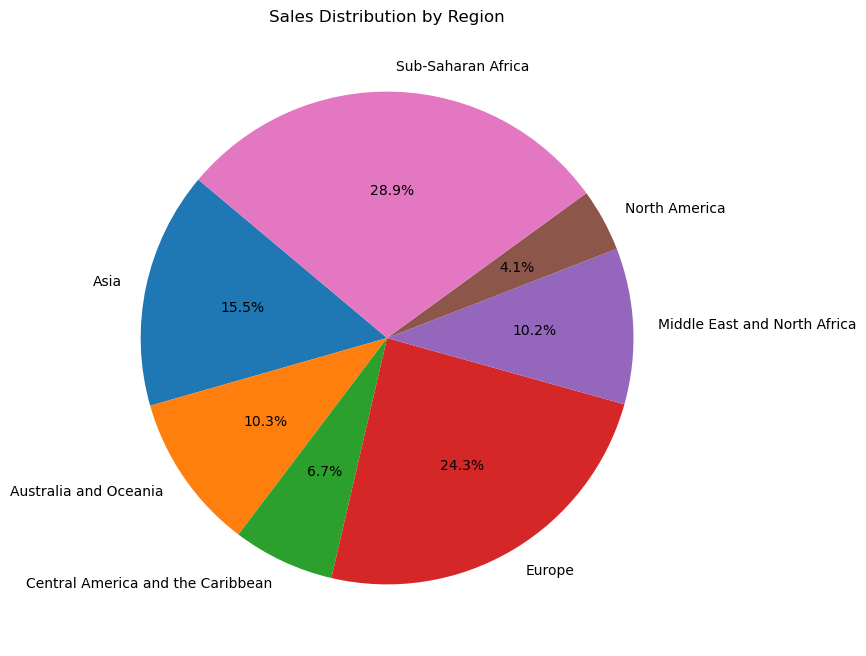

In [45]:
#Pie Chart
# Sum total revenue by region
region_sales = df.groupby('Region')['Total Revenue'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()


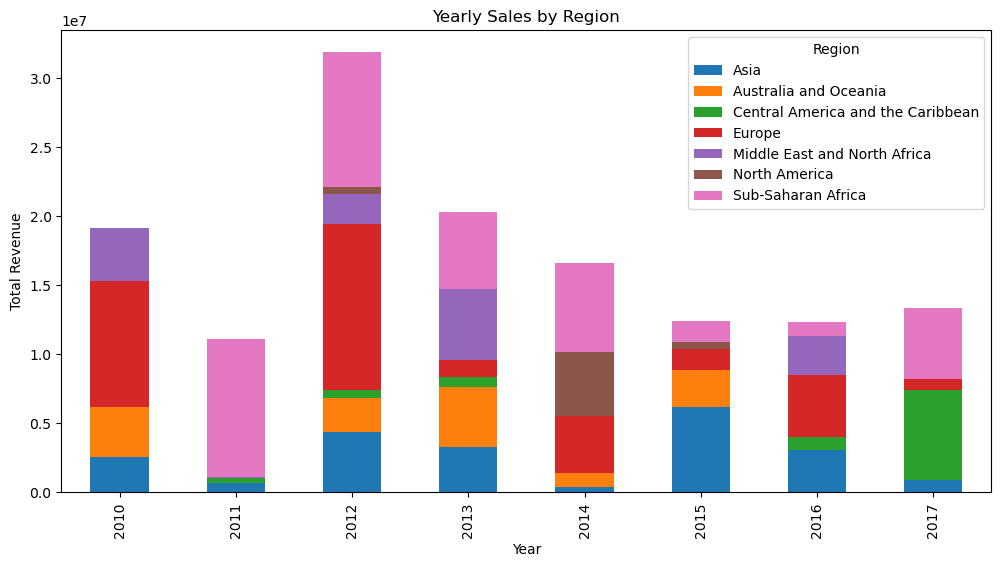

In [47]:
#Stacked Bar Chart
# Sum total revenue by year and region
year_region_sales = df.pivot_table(values='Total Revenue', index='order_year', columns='Region', aggfunc='sum')

# Plot stacked bar chart
year_region_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Yearly Sales by Region')
plt.ylabel('Total Revenue')
plt.xlabel('Year')
plt.show()


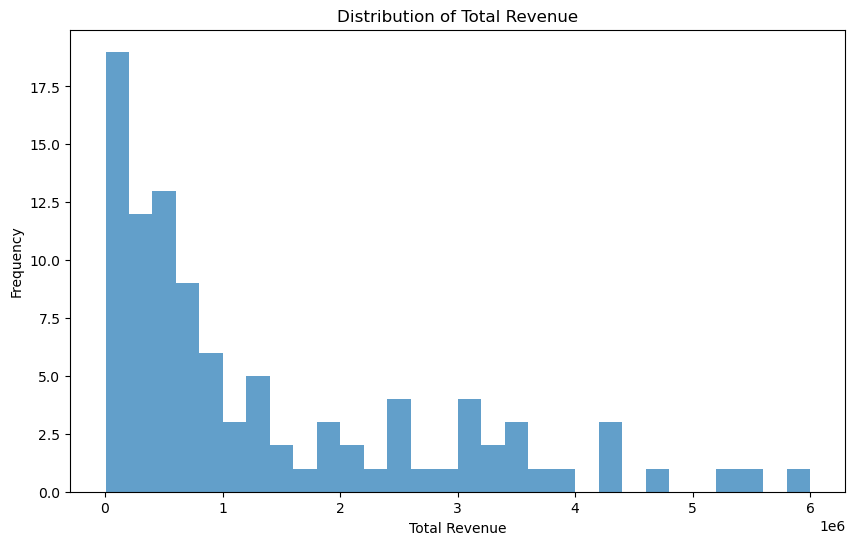

In [48]:
#Histogram
# Plot histogram of total revenue
plt.figure(figsize=(10, 6))
df['Total Revenue'].plot(kind='hist', bins=30, alpha=0.7)
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()


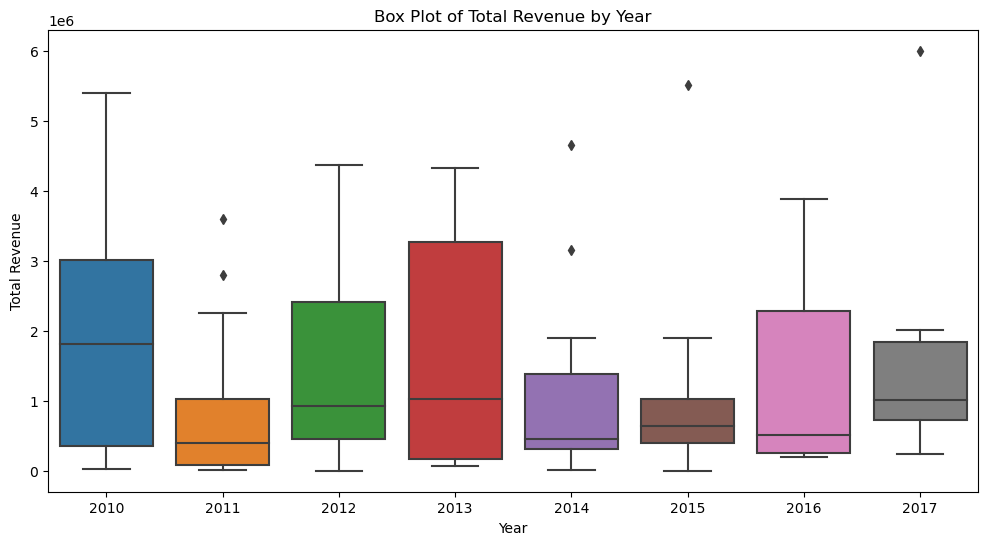

In [49]:
#Box Plot
# Plot box plot of total revenue by year
plt.figure(figsize=(12, 6))
sns.boxplot(x='order_year', y='Total Revenue', data=df)
plt.title('Box Plot of Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()


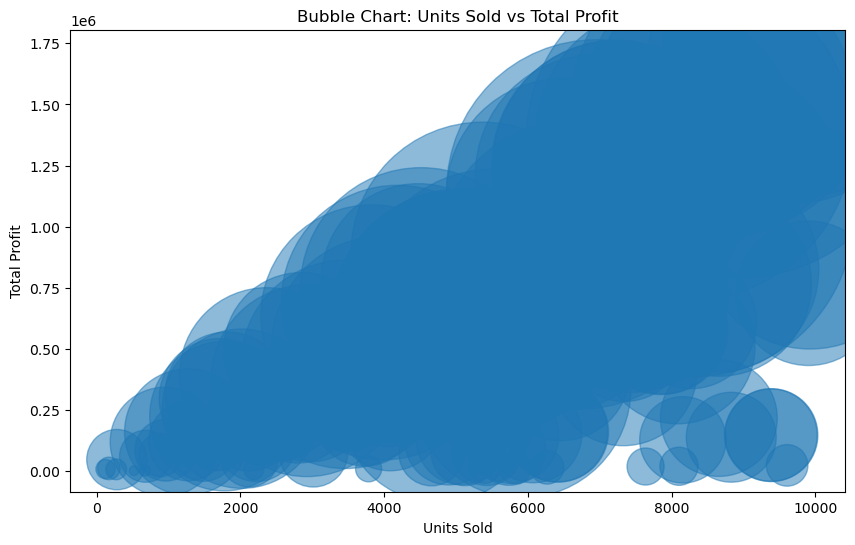

In [50]:
#Bubble Chart
# Sample data for bubble chart
bubble_data = df.sample(100)  # taking a sample for better visualization

# Plot bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(bubble_data['Units Sold'], bubble_data['Total Profit'], s=bubble_data['Total Revenue'] / 100, alpha=0.5)
plt.title('Bubble Chart: Units Sold vs Total Profit')
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.show()
